2.2.1. Project: Predict survival on the Titanic


Feature Engineering is a number of data preprocessing techniques to apply before building a model. It includes:
concept	description
normalizing	de-mean, scale or otherwise transform features
scaling	shift the mean and standard deviation
imputation	fill missing values
one-hot encoding	convert categories to binary columns
add features	add extra polynomial or combined features
feature selection	decide which features to use
How much and what kind of preprocessing is required strongly depends on your data and the model you want to build


More pandas commands

- pandas.DataFrame.cut()
- pandas.DataFrame.qcut()
- pandas.DataFrame.isna()
- pandas.DataFrame.dropna()
- pandas.get_dummies()
- pandas.factorize()
- pandas.get_dummies()


## Feature Engineering

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.3.0
numpy: 1.16.4
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.21.2


In [2]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

#define formating
_bold = '\033[1m'
_red = '\033[1;31m'
_blue  ='\033[1;34m'
_cyan = '\033[1;36m'
_green = '\033[0;32m'
_reset = '\033[0m'

print(_bold , np.__version__,_reset)

def import_data():
    _filedir = 'data/titamic/'
    _filename = 'train'
    _file = _filedir + _filename + '.csv'
    return _file


def get_dataframe():
    #pd.read_csv(import_data())
    file_df = pd.read_csv(import_data())
    return file_df



def get_info():
    print(_bold, "Columns:", _reset)
    print("")
    print(get_dataframe().columns)
    print("")
    print(_bold, "Shape:", _reset,get_dataframe().shape )
    print("")
    print(_bold, "Missing values:", _reset)
    print("")
    print(get_dataframe().isnull().sum())
    print("")
    print(_bold, "NaN values:", _reset)
    print("")
    print(get_dataframe().isna().sum())


def import_data():
    _filedir = 'data/titanic/'
    _filename = 'train'
    _file = _filedir + _filename + '.csv'
    return _file


def get_dataframe():
    #pd.read_csv(import_data())
    file_df = pd.read_csv(import_data())
    return file_df


def get_null_data():
    null_data = get_dataframe().isnull().sum()
    return null_data


def get_nan_data():
    na_data = get_dataframe().isna().sum()
    return na_data


def copy_data():
    file_df = pd.read_csv(import_data())
    file_df_copy = file_df.copy()
    return file_df_copy


def fillna():
    filled_na = dropped_df.fillna(method='bfill')  
    return filled_na


def multi_drop():
    multi_dropped = copy_data().drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    return multi_dropped


def feature_engineer(dataframe):
    d = {'female': 0,
         'male': 1}
    dataframe1 = dataframe.copy()
    dataframe1['Sex'] = dataframe1['Sex'].map(d)
    return dataframe1


def create_np_array():
    X = np.array([1 if x == 'male' else 0 for x in get_dataframe()['Sex']]).reshape(-1,1)
    return X
    y = get_dataframe()['Survived']   
    return y



 1.16.4 


#### Get file info


In [3]:
get_info()

 Columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Shape:  (891, 12)

 Missing values: 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 NaN values: 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:

def import_data():
    _filedir = 'data/titanic/'
    _filename = 'train'
    _file = _filedir + _filename + '.csv'
    return _file

import_data()

'data/titanic/train.csv'

#### Remove columns


In [5]:
#copy_data()

dropped_df = multi_drop()
dropped_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Fill Values


In [6]:
new_df = fillna()


#### Transform String 2 Number


In [7]:
newest = feature_engineer(new_df)
#newest

#### Create new clumns Embarked


In [8]:
dummydata = pd.get_dummies(newest['Embarked'])
    #multi_dropped = copy_data().drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

#dummydata

In [9]:
final = pd.concat([newest,dummydata],axis=1).drop(['Embarked'],axis=1)
final.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### All in one func


In [48]:
def feature_engineer(dataframe):
    d = {'female': 0,
         'male': 1}

    dataframe = dataframe.copy()
    #fill female & male strings
    dataframe['Sex'] = dataframe['Sex'].map(d)
    #drop columns
    dropped_cols = dataframe.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    #get dummy data from column 'Embarked'
    dummydata = pd.get_dummies(dropped_cols['Embarked'])
    concat = pd.concat([dropped_cols,dummydata],axis=1).drop(['Embarked'],axis=1)
    
    get_mean = concat.groupby(['Survived'])['Age'].mean()

    fill_age = concat['Age'].fillna(value=get_mean[0])
    final['Age'] = fill_age

    return final

final_df = feature_engineer(get_dataframe())
final_df.columns
#feature_engineer(get_dataframe()).isna().sum()


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

   ## Splitt Data

In [11]:
X = final_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','C', 'Q', 'S']]
#print(X)
y = final_df['Survived']
#print(y)
len(X) == len(y)

True

**2. Split data into X and y**

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y)

**3. Split X data into training and testing sets**

In [13]:
#Train Data  // Test Data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 10), (223, 10), (668,), (223,))

In [14]:
#X_train_new 

**5. "Build" a Random Forest model**

In [46]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of trees
# max_deph number of question
m = RandomForestClassifier(n_estimators=3, max_depth=10, criterion='gini')
m.fit(X_train, y_train)
m.score(X_train, y_train)

1.0

#### Create np array


In [18]:
X = np.array([1 if x == 'male' else 0 for x in fillna()['Sex']]).reshape(-1,1)
y = fillna()['Survived']

#print(type(X))
m = DecisionTreeClassifier()
m.fit(X,y)
m.score(X,y)

0.7867564534231201

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
<class 'numpy.ndarray'>


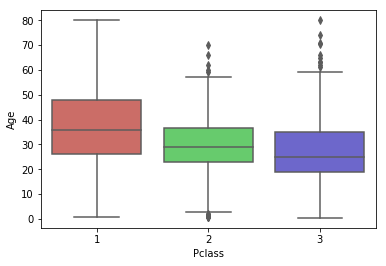

In [19]:
#copy_data().groupby(['Age']).Age.mean(]
mean_surv = copy_data().groupby(['Survived'])['Age'].mean()
mean_died = copy_data().groupby(['Survived'])['Age'].mean()[1]
mean_mean = (mean_surv + mean_died)#.mean()
print(mean_surv)

#copy_data()['Age'].fillna(method='bfill')
#copy_data()['Age'].fillna(value=mean_surv)


filled_data = copy_data()['Age'].fillna(method='bfill')

#list comp syntax - [x for x in list]                                  #(-1,1) 2-dimension
#Convert 2 np array
#X = np.array(get_dataframe()['Sex']).reshape(-1,1,1)

X = np.array([1 if x == 'male' else 0 for x in get_dataframe()['Sex']]).reshape(-1,1)
#print(X)
y = get_dataframe()['Survived']

print(type(X))

m = DecisionTreeClassifier()
m.fit(X,y)
m.score(X,y)

sb.boxplot(x='Pclass', y='Age', data=fillna(), palette='hls')
#sb.countplot(x='Survived',data=fillna(), palette='hls')

In [31]:
final_df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.690735
Name: Age, dtype: float64

In [41]:
final_df.groupby(['Survived'])['Age'].mean()
mean_classes = get_dataframe().groupby(['Pclass'])['Age'].mean()

mean_c1 = mean_classes[1]
mean_c2 = mean_classes[2]
mean_c3 = mean_classes[3]


print(mean_c1, mean_c2, mean_c3)
#df['Age']
#pd.get_dummies(fillna()['Embarked']).head()

38.233440860215055 29.87763005780347 25.14061971830986


In [42]:
get_dataframe().groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [43]:
mean_classes = get_dataframe().groupby(['Pclass'])['Age'].mean()
mean_c1 = mean_classes[1]
mean_c2 = mean_classes[2]
mean_c3 = mean_classes[3]



In [44]:
titanic_data = copy_data().drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


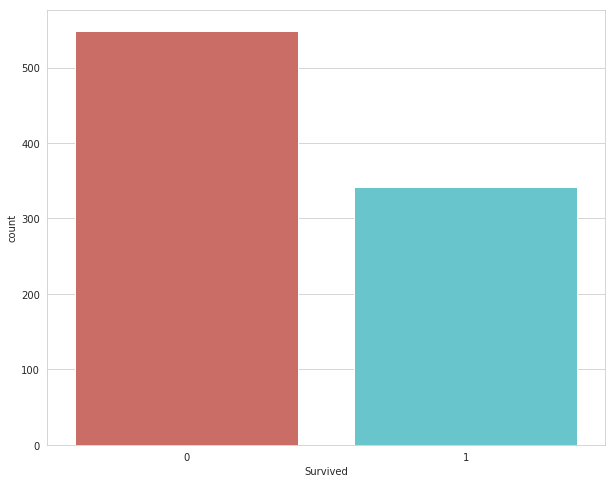

In [45]:
sb.countplot(x='Survived',data=titanic_data, palette='hls')

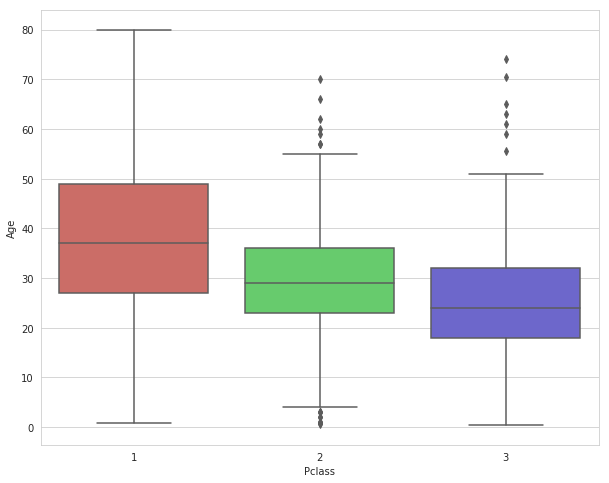

In [23]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')


sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')
None

In [24]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64